In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [ ]:

path=r"C:\Users\HP\Desktop\CODE\DATA ANALYSIS with PYTHON\cleaned_data_for2.2(old laptop data).csv"
df=pd.read_csv(path)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Price_binned,screen_Full_HD,screen_IPS_Panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,low,1,0


## Simple Linear Regression:

we know that 'cpu-frequency' has good enough correlation coeff and p-value to predict price
Thus,using cpu-frequency and price to make a SLR model

In [3]:
x=df[['CPU_frequency']]#has to e compulsorily 2D
y=df['Price']

#linear regression object
lm=LinearRegression()

#training the model
lm.fit(x,y)


LinearRegression()

In [4]:
#intercept:
lm.intercept_#posiive intercept

np.float64(253.6611706858214)

In [5]:
#coefficient:
lm.coef_#positive coef

array([1485.19362648])

In [ ]:
# predicting using old values
yhat=lm.predict(x)

yhat[0:5]#predicted prices based on each cpu_frequency value

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057])

In [12]:
#predict using new values
new_values=np.arange(1,11,1).reshape(-1,1)# these are nothing but artificially generated values for cpu frequency
yhat_new=lm.predict(new_values)

yhat_new[0:10]


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 1738.85479716,  3224.04842364,  4709.24205012,  6194.4356766 ,
        7679.62930308,  9164.82292955, 10650.01655603, 12135.21018251,
       13620.40380899, 15105.59743546])

<Axes: xlabel='CPU_frequency', ylabel='Price'>

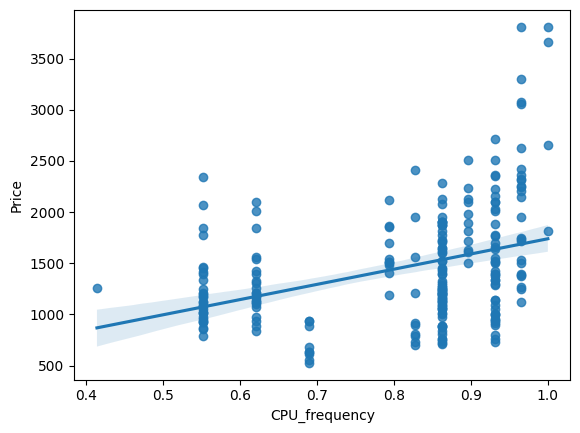

In [21]:
## PLotting regplot for SLR 

sns.regplot(x='CPU_frequency',y='Price',data=df)


-The line dosent fit the data well,thus CPU_frequency cannot be the variable,used for prediction

-The data points are curved;probably a MLR model or a Polynomial regresison model might fit better

-SLR model REJECTED


<Axes: xlabel='CPU_frequency', ylabel='Price'>

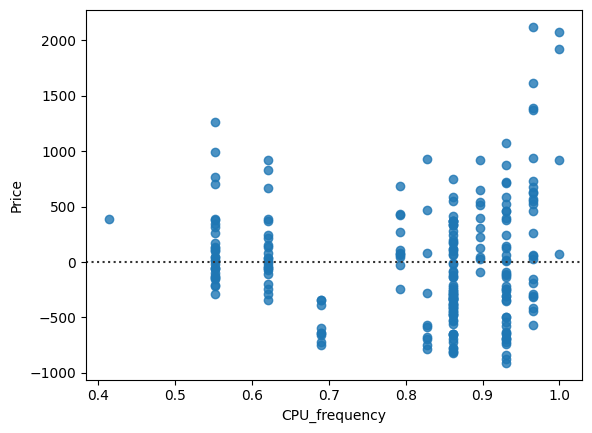

In [ ]:
#plotting residual plot for slr
sns.residplot(x=df['CPU_frequency'],y=df['Price'])

-Curvature in residuals is seen

-Variance of points from x axis is not consistent all along

-Data points are not randomly spread across x axis

-SLR model using CPU_frequency- REJECTED
(probably MLR model or Polynomial model might be a better fit)

## Multiple Linear Regression:

We know that- 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU','Category' are the most correlated variables to the price;
Using all of these for MLR

In [15]:
z=df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU','Category']]

#training the model:
lm1=LinearRegression()
lm1.fit(z,df['Price'])

LinearRegression()

In [ ]:
#intercept:
lm1.intercept_# negative intercept

np.float64(-841.9913259091256)

In [ ]:
# coefficient:
lm1.coef_# 7 coefficients, each for  7 variables

array([ 9.61283977e+02,  8.68089292e+01,  3.94604825e-01,  6.56633979e+01,
       -4.27445318e+02,  9.78000871e+01,  1.91295466e+02])

In [19]:
#rpediction:
yhat1=lm1.predict(z)
yhat1[0:5]

array([1345.51622771,  710.44905496, 1552.37242687, 1295.00681012,
       1543.13847022])

C:\Users\HP\AppData\Local\Temp\ipykernel_15312\1826492571.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(df['Price'],hist=False,color='r',label='Actual Values of Price')
C:\Users\HP\AppData\Local\Temp\ipykernel_15312\1826492571.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

<Axes: xlabel='Price', ylabel='Density'>

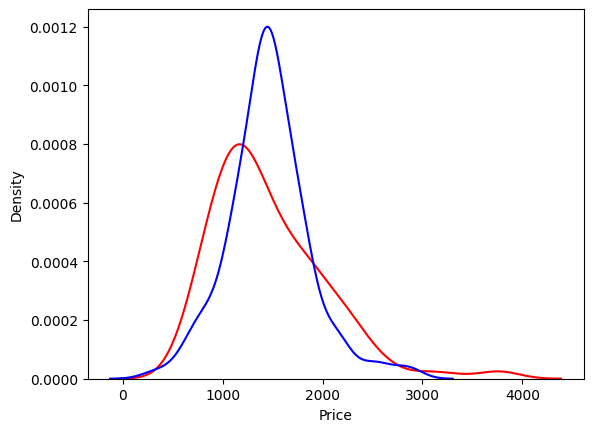

In [23]:
## Plotting using DISTRIBUTION PLOT(for actual values of price and predicted values of y-i.e yhat1)
ax1=sns.distplot(df['Price'],hist=False,color='r',label='Actual Values of Price')
sns.distplot(yhat1,hist=False,color='b',label='Predicted values of price',ax=ax1)


-For prices between 3000-4000 the predictions are wrong

-For prices between 1000-2000 the predictions are quite large as compared to original values

-Still a decent prediction model;not rejecting right now(will have to check R^2 and MSE first)

## Polynomial Regression:

In [ ]:
# Trying to fit a 3rd degree/cubic equation into our model(for 1 variable only,i.e. cpu_frequency)

predictor=df['CPU_frequency']#has tp be compulsorily 1D
target=df['Price']#has tp be compulsorily 1D

func=np.polyfit(predictor,target,5)
eq=np.poly1d(func)

yhat2=eq(x)
print(eq)

           5            4             3             2
1.357e+06 x - 4.72e+06 x + 6.458e+06 x - 4.336e+06 x + 1.425e+06 x - 1.818e+05


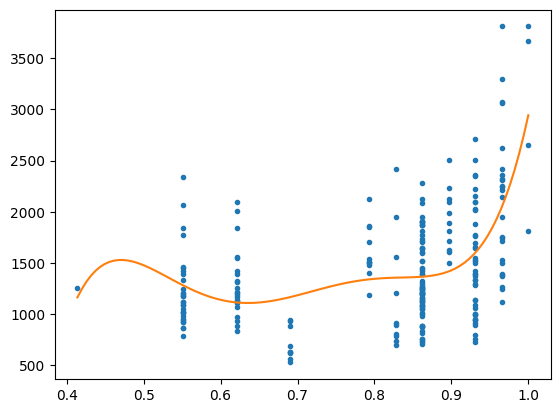

In [ ]:
#plotting 
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

PlotPolly(eq, predictor, target, 'CPU_frequency')

In [39]:
## prediction:
yhat2=eq(x)
yhat2[0:5]

array([[1278.64581827],
       [1164.46005824],
       [1598.76313097],
       [1278.64581827],
       [1113.53385151]])

## All models prepared,doing insample evaluation(MSE,R^2):

### R^2(R squared):

In [43]:
# for SLR

lm.score(x,y)

0.1344436321024326

In [45]:
# for MLR

lm1.score(z,df['Price'])

0.5082509055187376

In [ ]:
# for polynomial regression

r2_score(y,eq(y))#a negative value: implies overfitting

-5.178983018508341e+40

R squared: For polynomial regression its negative ,also MLR>SLR

### MSE(Mean Squared Error):

In [ ]:
# for SLR
mean_squared_error(y,yhat)

np.float64(284583.4405868629)

In [50]:
#For MLR
mean_squared_error(y,yhat1)

np.float64(161680.57263893104)

In [51]:
#For Plynomial regression
mean_squared_error(y,eq(x))

np.float64(229137.29548053455)

MSE: SLR>Polynomial regression>MLR

R^2 and MSE for MLR are most optimal;hence we will use MLR model i.e 'lm1' for predicting price of  laptops

--------------------------------------------------------END-------------------------------------------------------------